# Correlations

In this notebook I will be exploring correlations across datasets using the pandas library. This will be done by comparing columns with the target variable CAT_ELIG to find highly correlated features. Two variables are correlated when they move in coordination with one another. This aids in establishing statistical predictions. Finding correlations with the target variable will help us set up a predictive model to determine areas at risk for food insecurity.
Only some individuals were ineligible for SNAP benefits in 2007, but in 2017 all applications were approved. Therefore, finding correlations in the 2007 datasets will be an efficient measure, but not for the 2017 datasets. So I will only use correlated 2007 datasets and examine how those variables changed in 2017. 

## Table of Contents
* [Imports](#Imports)
   * [2007](#2007)
   * [2017](#2017)
* [Feature Selection](#Feature_Selection)
   * [Correlation Dataframes](#Coreelation_Dataframes)
   * [Correlation Plots](#Correlation_Plots)
   * [Observations](#Observations)
   * [Correlated Features](#Correlated_Features)
* [Final Dataset](#Final_Dataset)

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

from sklearn.decomposition import PCA
import autoreload
%load_ext autoreload
%autoreload 2
import python_code.Scripts as sc
import python_code.Reference as ref

In [2]:
#New Mexico
nm07 = pd.read_csv('./SNAP_Data/clean_nm07.csv')
nm17 = pd.read_csv('./SNAP_Data/clean_nm17.csv')

In [3]:
#Nebraska
ne07 = pd.read_csv('./SNAP_Data/clean_ne07.csv')
ne17 = pd.read_csv('./SNAP_Data/clean_ne17.csv')

# Feature Selection

## Correlated Dataframes

I will use some excel lists compiled from the original data dictionaries to find the related features, if found, and put them into individual groupings of dataframes.

### Correlation Plots

Referenced csv files:

In [4]:
#2007 datasets
unit07_demo= pd.read_csv('./SNAP_Data/07_DataDict/UNIT_Demo.csv')
unit07_assests= pd.read_csv('./SNAP_Data/07_DataDict/UNIT_Assets.csv')
unit07_exed= pd.read_csv('./SNAP_Data/07_DataDict/UNIT_ExDed.csv')
unit07_inc= pd.read_csv('./SNAP_Data/07_DataDict/UNIT_Inc.csv')
per07_char= pd.read_csv('./SNAP_Data/07_DataDict/PERS_Char.csv')
per07_inc= pd.read_csv('./SNAP_Data/07_DataDict/PERS_Inc.csv')

In [5]:
#2017 datasets
unit17_demo= pd.read_csv('./SNAP_Data/17_DataDict/UNIT_Demo.csv')
unit17_assests= pd.read_csv('./SNAP_Data/17_DataDict/UNIT_Assets.csv')
unit17_exed= pd.read_csv('./SNAP_Data/17_DataDict/UNIT_ExDed.csv')
unit17_inc= pd.read_csv('./SNAP_Data/17_DataDict/UNIT_Inc.csv')
per17_char= pd.read_csv('./SNAP_Data/17_DataDict/PERS_Char.csv')
per17_inc= pd.read_csv('./SNAP_Data/17_DataDict/PERS_Inc.csv')

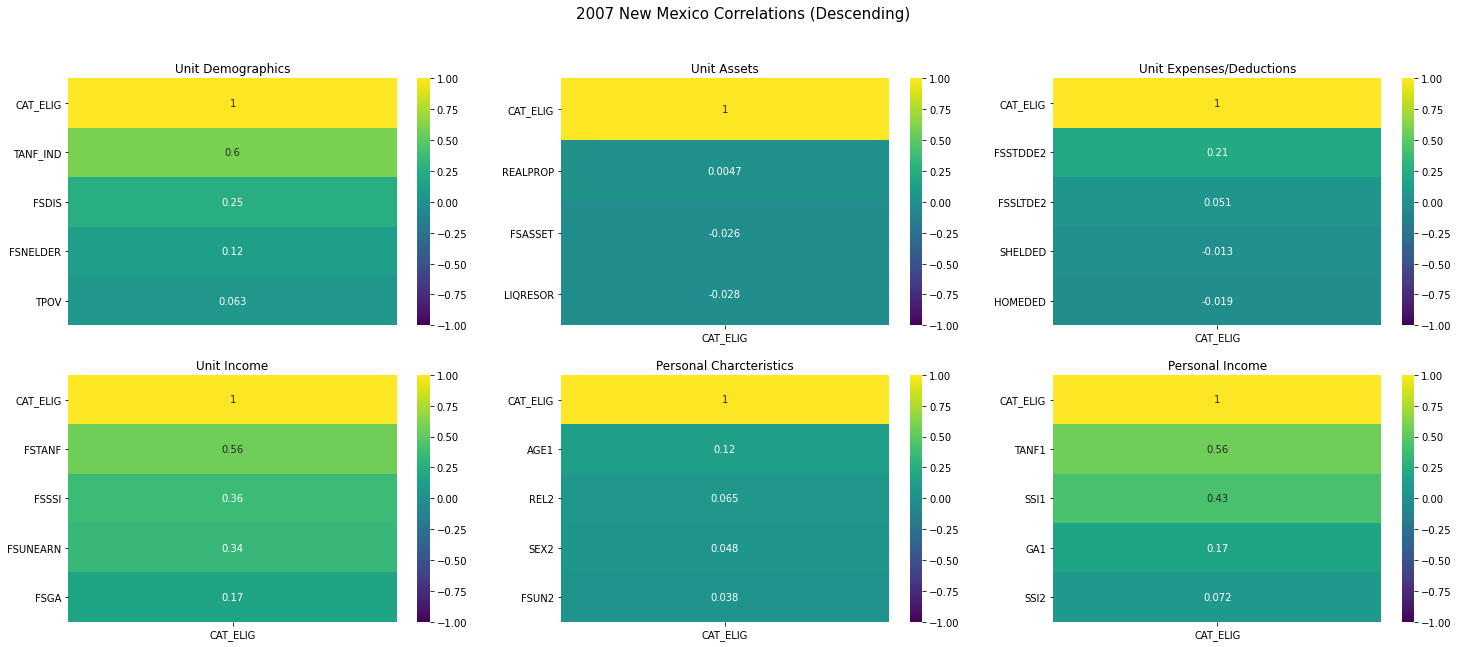

In [6]:
plt.figure(figsize= (25,10))
plt.suptitle("2007 New Mexico Correlations (Descending)",fontsize=15)
plt.subplot(2,3,1)
sns.heatmap(sc.corr_df(ref.unit07_demo, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True,xticklabels=[])
plt.title("Unit Demographics")
plt.yticks(rotation=0)
plt.subplot(2,3,2)
sns.heatmap(sc.corr_df(ref.unit07_assets, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Unit Assets")
plt.yticks(rotation=0)
plt.subplot(2,3,3)
sns.heatmap(sc.corr_df(ref.unit07_exded, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Unit Expenses/Deductions")
plt.yticks(rotation=0)
plt.subplot(2,3,4)
sns.heatmap(sc.corr_df(ref.unit07_inc, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Unit Income")
plt.yticks(rotation=0)
plt.subplot(2,3,5)
sns.heatmap(sc.corr_numcol(ref.per07_char, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Personal Charcteristics")
plt.yticks(rotation=0)
plt.subplot(2,3,6)
sns.heatmap(sc.corr_numcol(ref.per07_inc, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Personal Income")
plt.yticks(rotation=0)
plt.savefig('./images/correlations/corrD_nm07.png');

Above I am comparing each variable type to the category eligible in a heat map correlation model. I will be sorting by descending and ascending order so we can interpret the 5 highest correlations and the 5 lowest. 
Sorting by descending helps us see the strongest correlation on top (yellow). A 1 to 1 correlation means it's a perfect correlation. Therefore category eligible is the most correlated because it is being compared to itself. 
Each variable we’ve compared to category eligible are divided by categories: unit demographics, unit assets, unit expenses/deductions,unit income, personal characteristics, and personal income. The highest correlated variable is TANF_IND at a 0.6. Then follow FSTANF and TANF1 at 0.56, SSI1 at 0.43, and FSSSI at 0.36. 


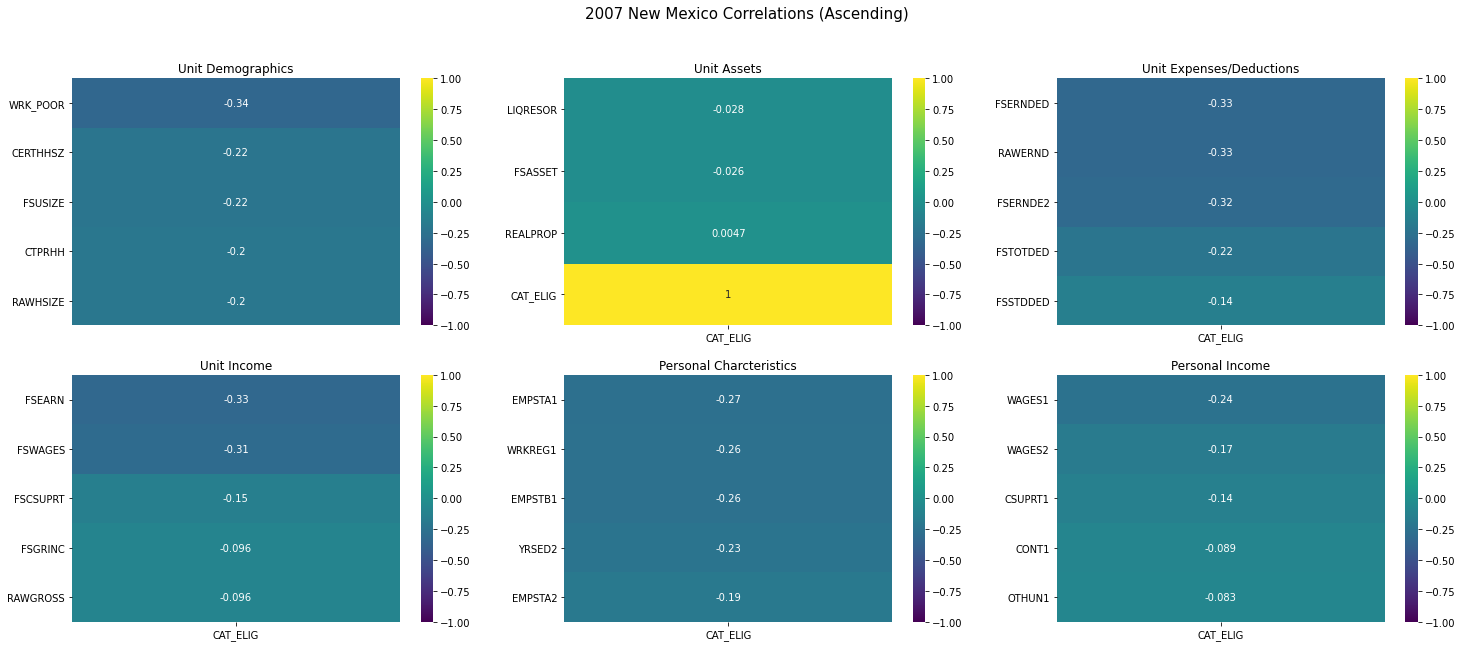

In [7]:
plt.figure(figsize= (25,10))
plt.suptitle("2007 New Mexico Correlations (Ascending)",fontsize=15)
plt.subplot(2,3,1)
sns.heatmap(sc.corr_df(ref.unit07_demo, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5),vmin=-1,vmax=1,cmap='viridis',annot=True,xticklabels=[])
plt.title("Unit Demographics")
plt.yticks(rotation=0)
plt.subplot(2,3,2)
sns.heatmap(sc.corr_df(ref.unit07_assets, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5),vmin=-1,vmax=1,cmap='viridis',annot=True)
plt.title("Unit Assets")
plt.yticks(rotation=0)
plt.subplot(2,3,3)
sns.heatmap(sc.corr_df(ref.unit07_exded, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5),vmin=-1,vmax=1,cmap='viridis',annot=True)
plt.title("Unit Expenses/Deductions")
plt.yticks(rotation=0)
plt.subplot(2,3,4)
sns.heatmap(sc.corr_df(ref.unit07_inc, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5),vmin=-1,vmax=1,cmap='viridis',annot=True)
plt.title("Unit Income")
plt.yticks(rotation=0)
plt.subplot(2,3,5)
sns.heatmap(sc.corr_numcol(ref.per07_char, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5),vmin=-1,vmax=1,cmap='viridis',annot=True)
plt.title("Personal Charcteristics")
plt.yticks(rotation=0)
plt.subplot(2,3,6)
sns.heatmap(sc.corr_numcol(ref.per07_inc, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5),vmin=-1,vmax=1,cmap='viridis',annot=True)
plt.title("Personal Income")
plt.yticks(rotation=0)
plt.savefig('./images/correlations/corrA_nm07.png');

The lowest correlations will be shown at the top of these heatmaps. The lowest correlated variable from the 2007 NM dataset was WRK_POOR at -0.34 and at -0.33 FSEARN and FSERNDED follow.

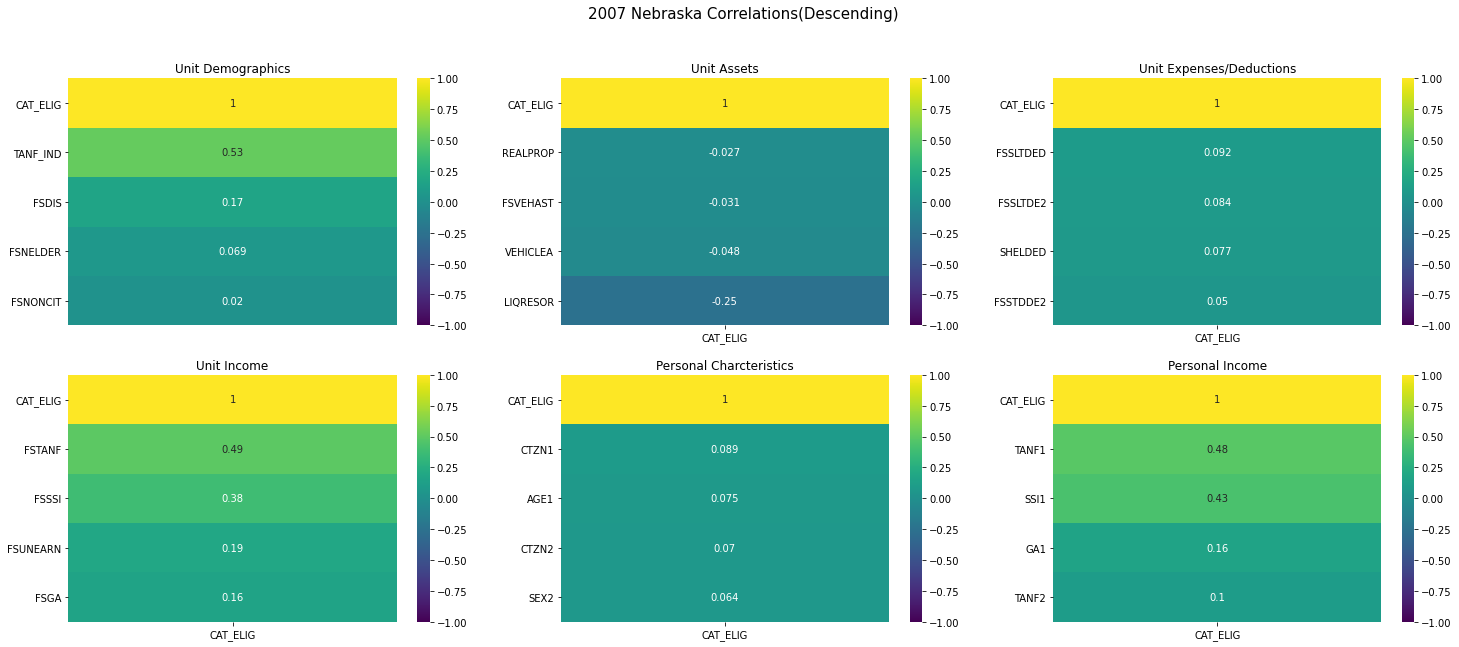

In [8]:
plt.figure(figsize= (25,10))
plt.suptitle("2007 Nebraska Correlations(Descending)",fontsize=15)
plt.subplot(2,3,1)
sns.heatmap(sc.corr_df(ref.unit07_demo, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True,xticklabels=[])
plt.title("Unit Demographics")
plt.yticks(rotation=0)
plt.subplot(2,3,2)
sns.heatmap(sc.corr_df(ref.unit07_assets, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Unit Assets")
plt.yticks(rotation=0)
plt.subplot(2,3,3)
sns.heatmap(sc.corr_df(ref.unit07_exded, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Unit Expenses/Deductions")
plt.yticks(rotation=0)
plt.subplot(2,3,4)
sns.heatmap(sc.corr_df(ref.unit07_inc, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Unit Income")
plt.yticks(rotation=0)
plt.subplot(2,3,5)
sns.heatmap(sc.corr_numcol(ref.per07_char, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Personal Charcteristics")
plt.yticks(rotation=0)
plt.subplot(2,3,6)
sns.heatmap(sc.corr_numcol(ref.per07_inc, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5),vmin=-1,cmap='viridis',annot=True)
plt.title("Personal Income")
plt.yticks(rotation=0)
plt.savefig('./images/correlations/corrD_ne07.png');

The top 5 correlations for Nebraska 2007 were TANF_IND at 0.53, FSTANF at 0.49, TANF_1 at 0.48, SSI1 at 0.43, FSSSI at 0.38.

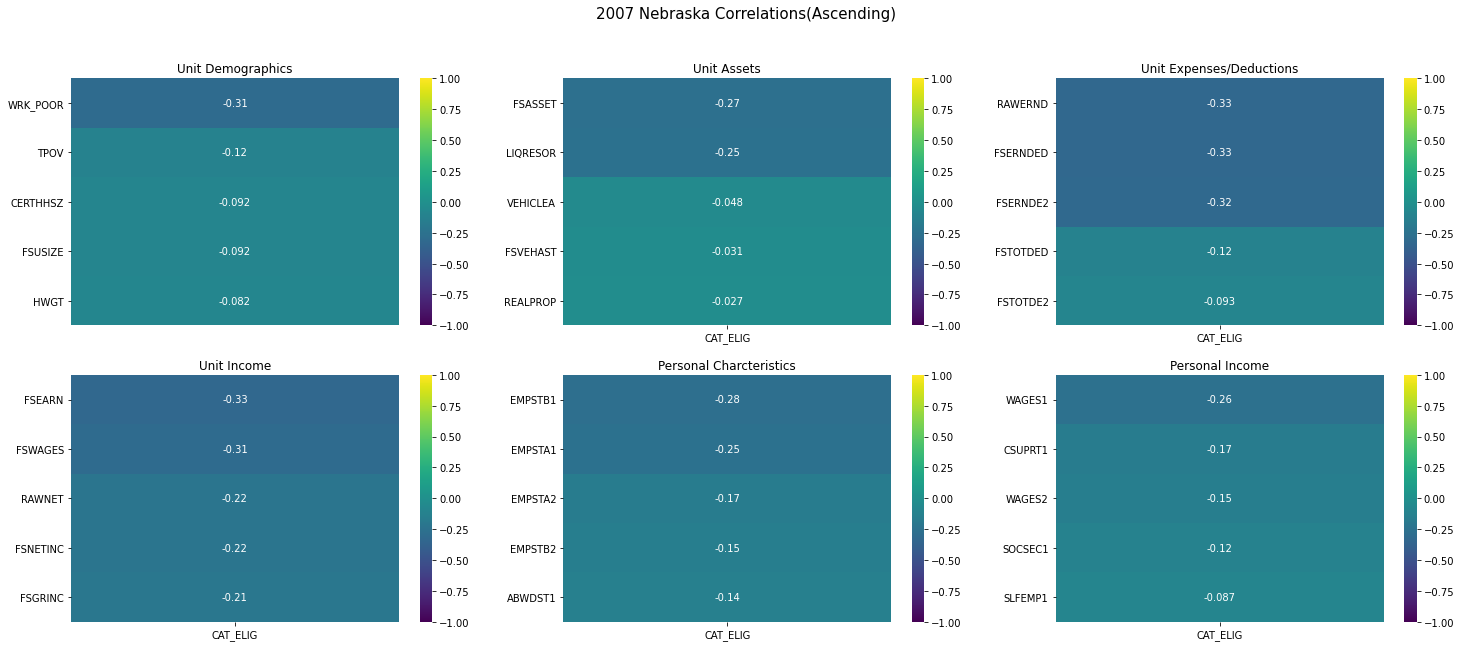

In [9]:
plt.figure(figsize= (25,10))
plt.suptitle("2007 Nebraska Correlations(Ascending)",fontsize=15)
plt.subplot(2,3,1)
sns.heatmap(sc.corr_df(ref.unit07_demo, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5),vmin=-1,vmax=1,cmap='viridis',annot=True,xticklabels=[])
plt.title("Unit Demographics")
plt.yticks(rotation=0)
plt.subplot(2,3,2)
sns.heatmap(sc.corr_df(ref.unit07_assets, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5),vmin=-1,vmax=1,cmap='viridis',annot=True)
plt.title("Unit Assets")
plt.yticks(rotation=0)
plt.subplot(2,3,3)
sns.heatmap(sc.corr_df(ref.unit07_exded, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5),vmin=-1,vmax=1,cmap='viridis',annot=True)
plt.title("Unit Expenses/Deductions")
plt.yticks(rotation=0)
plt.subplot(2,3,4)
sns.heatmap(sc.corr_df(ref.unit07_inc, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5),vmin=-1,vmax=1,cmap='viridis',annot=True)
plt.title("Unit Income")
plt.yticks(rotation=0)
plt.subplot(2,3,5)
sns.heatmap(sc.corr_numcol(ref.per07_char, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5),vmin=-1,vmax=1,cmap='viridis',annot=True)
plt.title("Personal Charcteristics")
plt.yticks(rotation=0)
plt.subplot(2,3,6)
sns.heatmap(sc.corr_numcol(ref.per07_inc, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5),vmin=-1,vmax=1,cmap='viridis',annot=True)
plt.title("Personal Income")
plt.yticks(rotation=0)
plt.savefig('./images/correlations/corrA_ne07.png');

The weakest correlations for 2007 Nebraska were RAWEARNED -0.33, FSERN -0.33, and WRK_POOR -0.31.

# Observations

The order of highest to lowest impact on SNAP elgibility is:
 1. Whether the family is receiving TANF benefits.
 2. Whether the head of household is receiving TANF benefits.
 3. If the head of household receiving social security (SSI).
 4. If other members in the household are receiving social security.
This tells us that the biggest impact on vulnerable communities within New Mexico and Nebraska are due to the head of households personal characteristics. Out of that, we see the biggest impact on SNAP eligibility is receiving benefits from other assistance programs, especially TANF (Temporary Assistance for Needy Families). This is a slightly bigger factor for New Mexico residents over Nebraska residents. More households/head of households recieved TANF in 2007. That may account for wider eligibility of applicants in 2017, because less people in the SNAP program were receiving TANF income. 

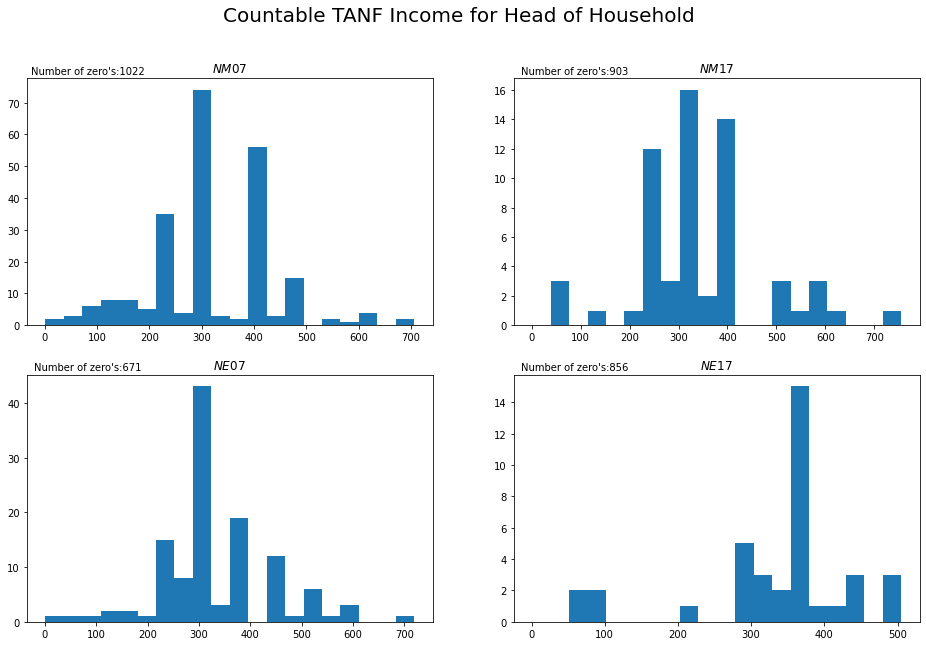

In [10]:
sc.plot_features_hist('FSTANF','unit_tanf',"Countable TANF Income for Head of Household")

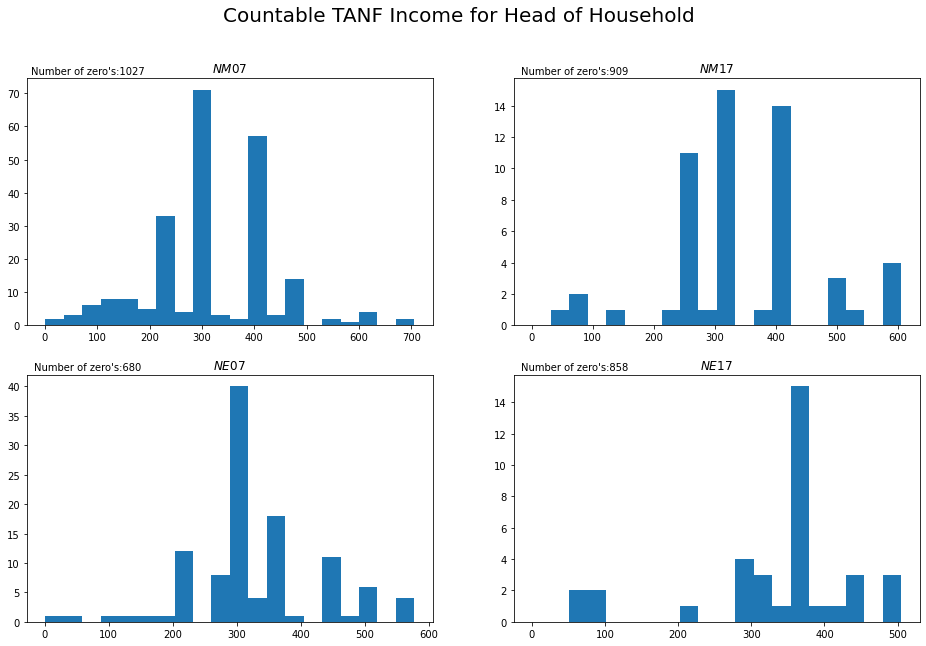

In [11]:
sc.plot_features_hist('TANF1','pers_tanf1',"Countable TANF Income for Head of Household")

There are other highly correlated categories that are similar in both. After, receiving benefits from assistance programs, the next big category is FSUNEARN which is unit unearned income. Meaning the majority of their income is coming from other assistance program, besides TANF and social security.

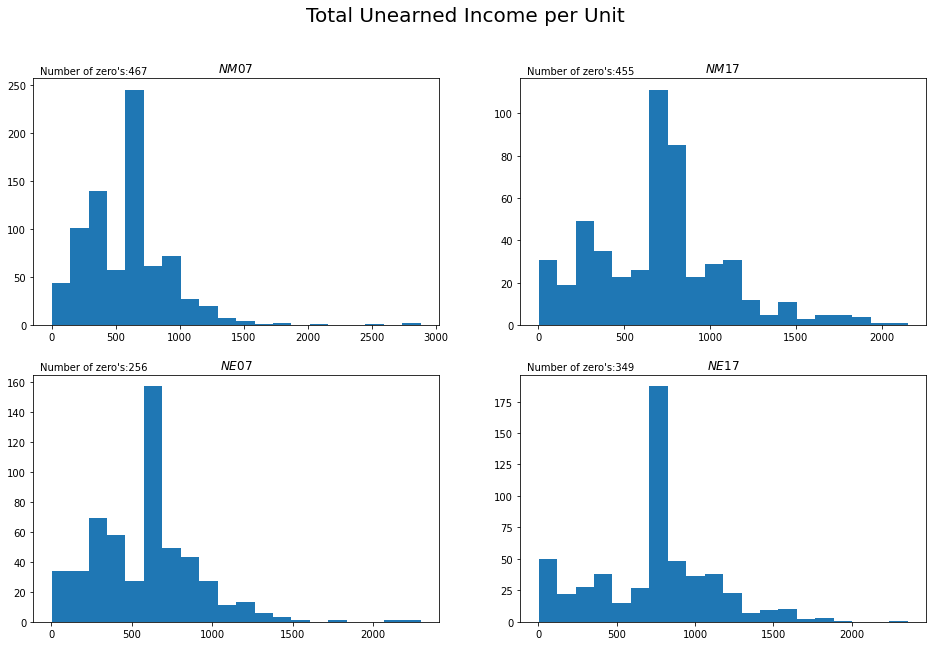

In [12]:
sc.plot_features_hist('FSUNEARN','unit_unearn',"Total Unearned Income per Unit")

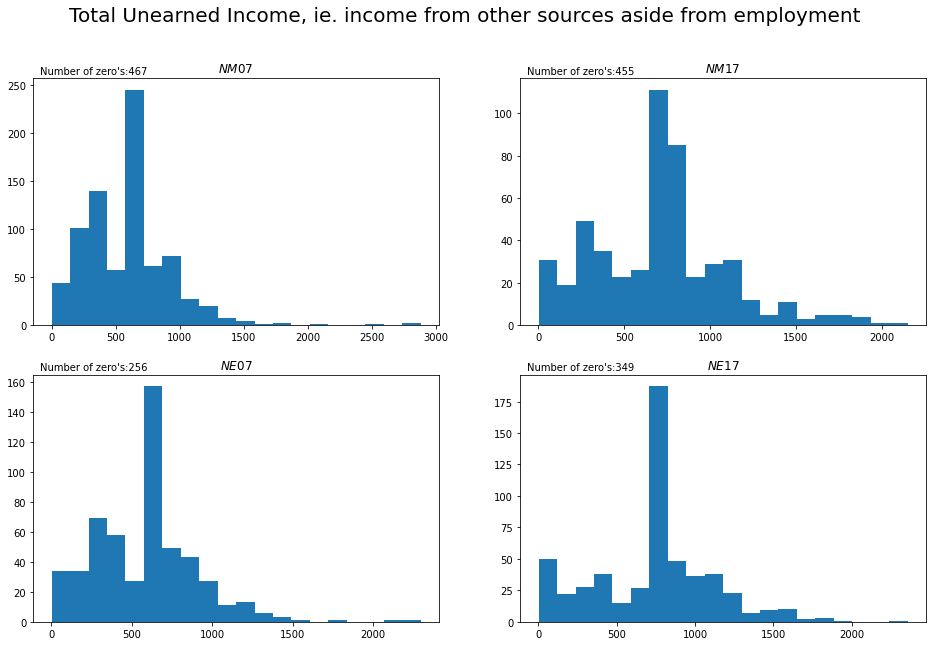

In [13]:
sc.plot_features_hist('FSUNEARN','unit_unearn',"Total Unearned Income, ie. income from other sources aside from employment")

And their are unexpected missing variables in these correlations. First being WRK_POOR which means households with at least two indicators of earnings. Meaning the majority of people receiving benefits in 2007 had 1 income source outside of financial assistance. And in both 2007 and 2017 there are more people working yet qualifiying for benefits in New Mexico than in Nebraska.

C:\Users\Bhakt\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Bhakt\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Bhakt\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Bhakt\anaconda3\lib\si

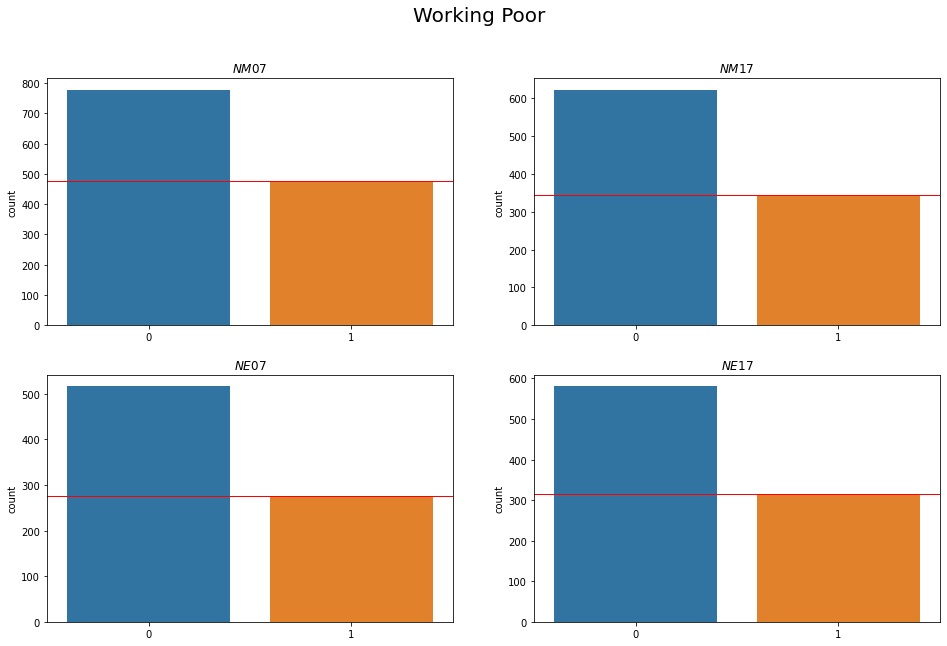

In [14]:
sc.plot_features('WRK_POOR','wrk_pr',"Working Poor")

The negative correlations are just as interesting. It seems that in Nebraska, car ownership has a negative impact on receiving SNAP. But in New Mexico there were so few SNAP receipients with cars, both the FSVEHAST and VEHICLEA fields were dropped in the first EDA notebook.

Though there is a note in the 2007 Technical Documents about vehicle ownership. This variable can signify one community not having access to alot of vehicles (New Mexico) vs another community having vehicles (Nebraska) and still receiving SNAP.

"Most units have no countable vehicle assets (FSVEHAST=0). Among units with positive countable vehicle assets (FSVEHAST>0), some units are coded as having no vehicles (VEHICLEA=1, VEHICLEB=1 or missing) or as having no countable vehicles (VEHICLEA=1,2,3,4,5 and VEHICLEB=1,2,3,4,5 or missing). Because VEHICLEA and VEHICLEB are not consistent with FSVEHAST, we recommend against using either variable to tabulate the category of vehicle owned by the unit."

VEHICLEA is not found in all datasets since more than half of the data was missing and therefore dropped in the first round of cuts. The only dataset that it was reported in was Nebraska 2007 data, which has been graphed below. Of note on the categories: Category 2 means the vehicle is used to get income and therefore is exempt.

C:\Users\Bhakt\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


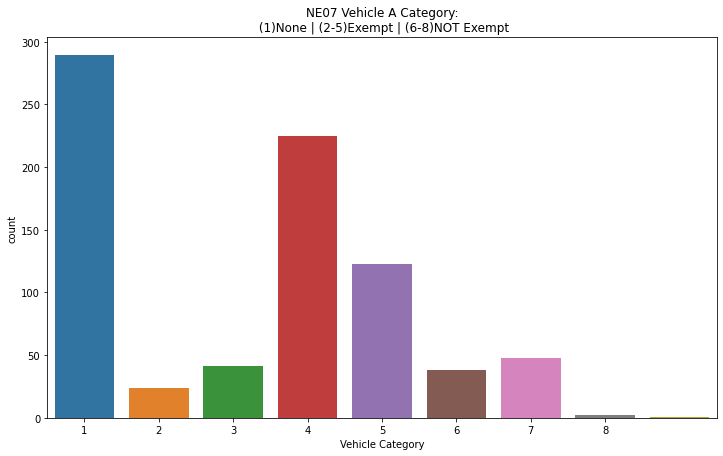

In [15]:
plt.figure(figsize = (12,7))
sns.countplot(ne07['VEHICLEA'])
plt.xticks(np.arange(8),labels=[1,2,3,4,5,6,7,8])
plt.xlabel("Vehicle Category")
plt.title("NE07 Vehicle A Category:\n (1)None | (2-5)Exempt | (6-8)NOT Exempt")
plt.savefig("./images/ind_features/vehA.png");

## Correlated Features

I will be using all of the top and bottom indicators for a final dataset of values to be passed into a model for prediction.

In [16]:
set1 = list(pd.DataFrame(sc.corr_df(ref.unit07_demo, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5)).T.columns)
set2 = list(pd.DataFrame(sc.corr_df(ref.unit07_assets, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5)).T.columns)
set3 = list(pd.DataFrame(sc.corr_df(ref.unit07_exded, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5)).T.columns)
set4 = list(pd.DataFrame(sc.corr_df(ref.unit07_inc, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5)).T.columns)
set5 = list(pd.DataFrame(sc.corr_df(ref.per07_char, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5)).T.columns)
set6 = list(pd.DataFrame(sc.corr_df(ref.per07_inc, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5)).T.columns)

set7 = list(pd.DataFrame(sc.corr_df(ref.unit07_demo, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5)).T.columns)
set8 = list(pd.DataFrame(sc.corr_df(ref.unit07_assets, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5)).T.columns)
set9 = list(pd.DataFrame(sc.corr_df(ref.unit07_exded, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5)).T.columns)
set10 = list(pd.DataFrame(sc.corr_df(ref.unit07_inc, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5)).T.columns)
set11 = list(pd.DataFrame(sc.corr_df(ref.per07_char, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5)).T.columns)
set12 = list(pd.DataFrame(sc.corr_df(ref.per07_inc, nm07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5)).T.columns)

corr_features = set1 + set2 + set3 + set4 + set5 + set6 + set7 + set8 + set9 + set10 + set11

In [17]:
set1 = list(pd.DataFrame(sc.corr_df(ref.unit07_demo, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5)).T.columns)
set2 = list(pd.DataFrame(sc.corr_df(ref.unit07_assets, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5)).T.columns)
set3 = list(pd.DataFrame(sc.corr_df(ref.unit07_exded, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5)).T.columns)
set4 = list(pd.DataFrame(sc.corr_df(ref.unit07_inc, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5)).T.columns)
set5 = list(pd.DataFrame(sc.corr_df(ref.per07_char, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5)).T.columns)
set6 = list(pd.DataFrame(sc.corr_df(ref.per07_inc, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=False).head(5)).T.columns)

set7 = list(pd.DataFrame(sc.corr_df(ref.unit07_demo, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5)).T.columns)
set8 = list(pd.DataFrame(sc.corr_df(ref.unit07_assets, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5)).T.columns)
set9 = list(pd.DataFrame(sc.corr_df(ref.unit07_exded, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5)).T.columns)
set10 = list(pd.DataFrame(sc.corr_df(ref.unit07_inc, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5)).T.columns)
set11 = list(pd.DataFrame(sc.corr_df(ref.per07_char, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5)).T.columns)
set12 = list(pd.DataFrame(sc.corr_df(ref.per07_inc, ne07).corr()[['CAT_ELIG']].sort_values(by = 'CAT_ELIG',ascending=True).head(5)).T.columns)

corr_features = set1 + set2 + set3 + set4 + set5 + set6 + set7 + set8 + set9 + set10 + set11
corr_features=set(corr_features)
corr_features.remove('CAT_ELIG')

In [18]:
print(f'There are {len(corr_features)} features in corr_features:\n')
corr_features

There are 32 features in corr_features:



{'CERTHHSZ',
 'FSASSET',
 'FSDIS',
 'FSEARN',
 'FSERNDE2',
 'FSERNDED',
 'FSGA',
 'FSGRINC',
 'FSNELDER',
 'FSNETINC',
 'FSNONCIT',
 'FSSLTDE2',
 'FSSLTDED',
 'FSSSI',
 'FSSTDDE2',
 'FSTANF',
 'FSTOTDE2',
 'FSTOTDED',
 'FSUNEARN',
 'FSUSIZE',
 'FSVEHAST',
 'FSWAGES',
 'HWGT',
 'LIQRESOR',
 'RAWERND',
 'RAWNET',
 'REALPROP',
 'SHELDED',
 'TANF_IND',
 'TPOV',
 'VEHICLEA',
 'WRK_POOR'}

# Final Dataset

In [19]:
corr_features=list(corr_features)
pd.DataFrame(corr_features,columns=['Table 1']).to_csv("./SNAP_Data/corr_features.csv",index=None)

In [20]:
df1 = sc.final(corr_features,nm07)
df2 = sc.final(corr_features,nm17)
df3 = sc.final(corr_features,ne07)
df4 = sc.final(corr_features,ne17)

In [21]:
df = pd.concat([df1,df2,df3,df4])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3904 entries, 0 to 893
Data columns (total 33 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CERTHHSZ  3904 non-null   float64
 1   FSWAGES   3904 non-null   float64
 2   FSUSIZE   3904 non-null   float64
 3   FSSLTDED  3904 non-null   float64
 4   REALPROP  2046 non-null   float64
 5   FSGRINC   3904 non-null   float64
 6   RAWERND   3904 non-null   float64
 7   FSERNDE2  3904 non-null   float64
 8   FSTOTDED  3904 non-null   float64
 9   SHELDED   3904 non-null   float64
 10  HWGT      3904 non-null   float64
 11  FSEARN    3904 non-null   float64
 12  FSNELDER  3904 non-null   float64
 13  FSDIS     3904 non-null   float64
 14  FSTOTDE2  3904 non-null   float64
 15  FSTANF    3904 non-null   float64
 16  TPOV      3904 non-null   float64
 17  FSSSI     3904 non-null   float64
 18  FSNONCIT  3904 non-null   float64
 19  FSUNEARN  3904 non-null   float64
 20  FSNETINC  3904 non-null   float

In [23]:
df.isnull().sum()

CERTHHSZ       0
FSWAGES        0
FSUSIZE        0
FSSLTDED       0
REALPROP    1858
FSGRINC        0
RAWERND        0
FSERNDE2       0
FSTOTDED       0
SHELDED        0
HWGT           0
FSEARN         0
FSNELDER       0
FSDIS          0
FSTOTDE2       0
FSTANF         0
TPOV           0
FSSSI          0
FSNONCIT       0
FSUNEARN       0
FSNETINC       0
RAWNET         0
LIQRESOR     964
FSSLTDE2       0
FSASSET      964
TANF_IND       0
WRK_POOR       0
FSERNDED       0
FSSTDDE2       0
FSGA           0
CAT_ELIG       0
FSVEHAST    2219
VEHICLEA    3113
dtype: int64

We have some expected null values in the final dataframe since not all fields in all 4 datasets made it past the initial cuts. VEHICLEA will be replaced with a 1, all others will be filled with 0.

In [24]:
df['VEHICLEA']=df['VEHICLEA'].fillna(1)

In [25]:
df.isnull().sum()

CERTHHSZ       0
FSWAGES        0
FSUSIZE        0
FSSLTDED       0
REALPROP    1858
FSGRINC        0
RAWERND        0
FSERNDE2       0
FSTOTDED       0
SHELDED        0
HWGT           0
FSEARN         0
FSNELDER       0
FSDIS          0
FSTOTDE2       0
FSTANF         0
TPOV           0
FSSSI          0
FSNONCIT       0
FSUNEARN       0
FSNETINC       0
RAWNET         0
LIQRESOR     964
FSSLTDE2       0
FSASSET      964
TANF_IND       0
WRK_POOR       0
FSERNDED       0
FSSTDDE2       0
FSGA           0
CAT_ELIG       0
FSVEHAST    2219
VEHICLEA       0
dtype: int64

In [26]:
df = df.fillna(0)

In [27]:
df.isnull().sum().sum()

0

In [28]:
df.to_csv('./SNAP_Data/final.csv',index=None)